In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('train_u6lujuX_CVtuZ9i.csv')

In [3]:
#display top 5 rows of dataset
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#LOAN AMOUNT:loan amount in thousant of dollars
#loan_amount_term:team of loan in months
#credit_history=credit history meet guideline or not
#property area:urban/semiurban/rural
#loan approver or not(this is output)

# print shape of data frame i.e no of rows and column


In [5]:
df.shape

(614, 13)

In [6]:
print("number of rows are :" ,df.shape[0])
print("number of columns are :" ,df.shape[1])

number of rows are : 614
number of columns are : 13


# get information about data no of rows,column,datatype,memory

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# check null value

In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
#in percentage
df.isnull().sum()*100/len(df)

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

# removing unnecessary data


In [10]:

df=df.drop('Loan_ID',axis=1)

In [11]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# dropping missing values


In [12]:
#dropping those which are less then 5%
remove=['Gender','Dependents','LoanAmount','Loan_Amount_Term']

In [13]:
df=df.dropna(subset=remove)

In [14]:
df.isnull().sum()*100/len(df)

Gender               0.000000
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        5.424955
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     0.000000
Credit_History       8.679928
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

# filling values in self_employed

In [15]:
#mode() is used to find the most common value in the 'Self_Employed' column
#only want 0 row  of output so in next line mode()[0]
df['Self_Employed'].mode()

0    No
Name: Self_Employed, dtype: object

In [16]:
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [17]:
df.isnull().sum()*100/len(df)

Gender               0.000000
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        0.000000
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     0.000000
Credit_History       8.679928
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [18]:
#now doing same with credit_history
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [19]:
df['Credit_History'].mode()

0    1.0
Name: Credit_History, dtype: float64

In [20]:
#find which is most freq value and put that in null rows
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [21]:
df.isnull().sum()*100/len(df)

Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

# EDA univariate

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Gender'>

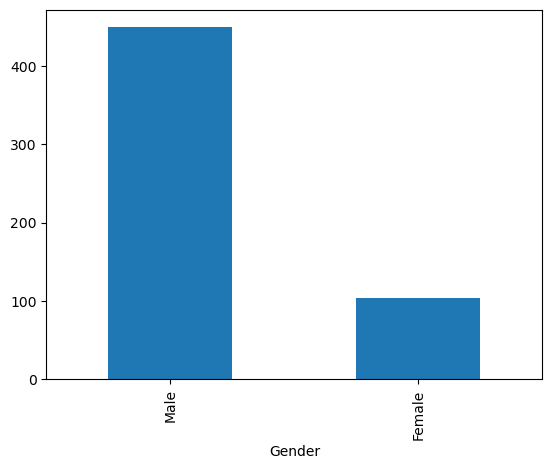

In [23]:
#finding which gender is more interested in taking loan
df['Gender'].value_counts().plot(kind='bar')

<Axes: xlabel='Education'>

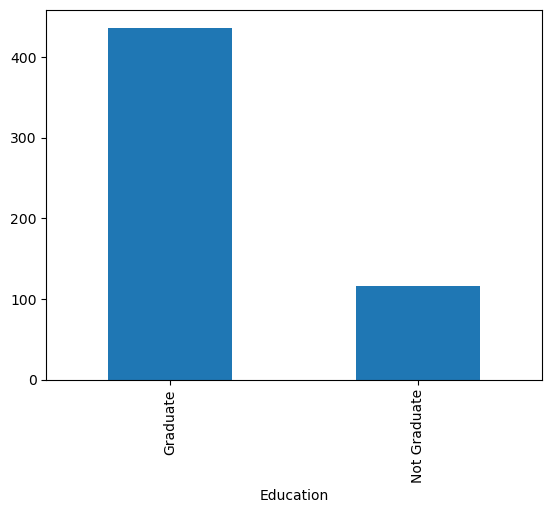

In [24]:
#how many among them are graduated
df['Education'].value_counts().plot(kind='bar')
#more graduating people are opting for loan

In [25]:
#how many of them are self employed

<Axes: ylabel='count'>

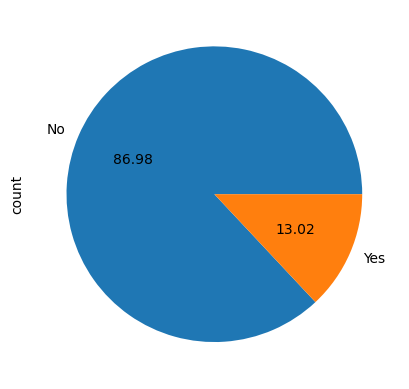

In [26]:
df['Self_Employed'].value_counts().plot(kind='pie', autopct='%.2f')


<Axes: ylabel='count'>

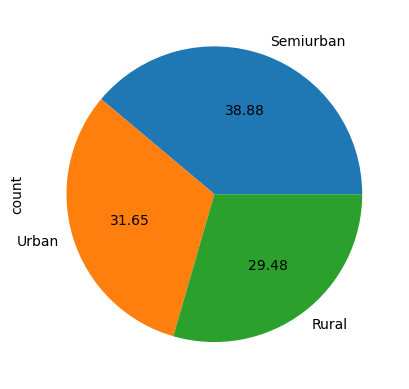

In [27]:
#in which property they are living
df['Property_Area'].value_counts().plot(kind='pie',autopct='%.2f')

(array([480.,  55.,  12.,   0.,   4.,   0.,   0.,   1.,   0.,   1.]),
 array([  150.,  8235., 16320., 24405., 32490., 40575., 48660., 56745.,
        64830., 72915., 81000.]),
 <BarContainer object of 10 artists>)

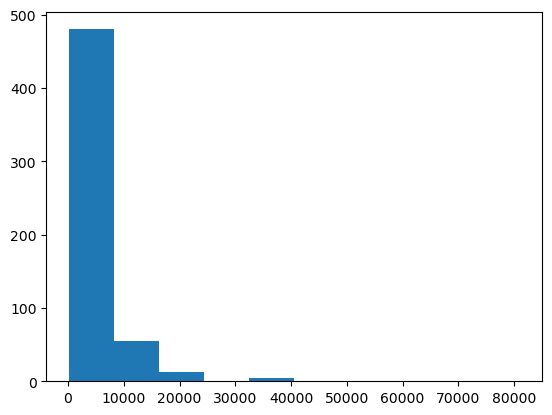

In [28]:
#working on categorical data
#making numberical data behave like categorical data by using histogram (converting data in bins)
plt.hist(df['ApplicantIncome'])

C:\Users\KESHAV CHAWLA\AppData\Local\Temp\ipykernel_8788\2170627835.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncome'])
C:\Users\KESHAV CHAWLA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='ApplicantIncome', ylabel='Density'>

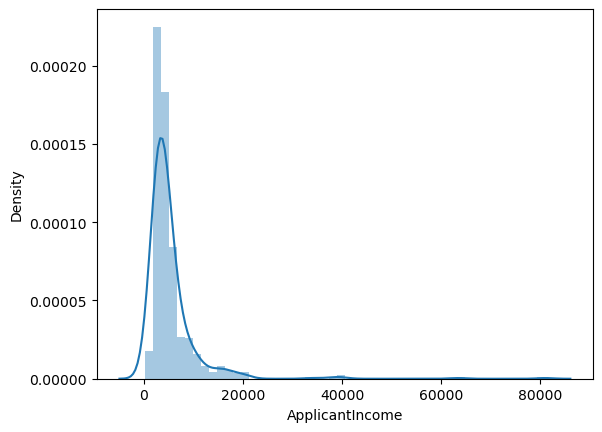

In [29]:
#can get percentage and can also tell skewness
sns.distplot(df['ApplicantIncome'])

# bivariate and multivariate eda


<Axes: xlabel='Self_Employed', ylabel='LoanAmount'>

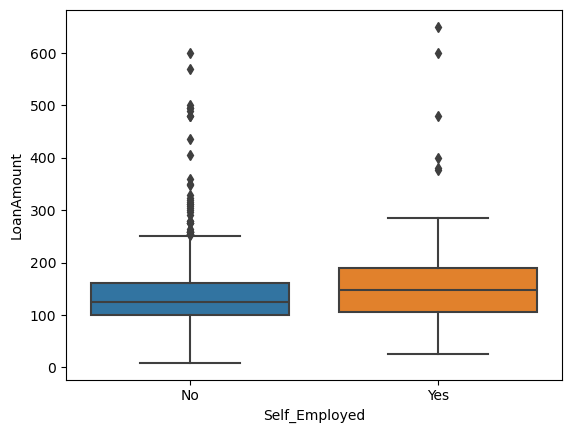

In [30]:
#how employed or not is effecting loan amount(categorical and numerical)
import seaborn as sns

# Create a box plot
sns.boxplot(x='Self_Employed', y='LoanAmount', data=df)


In [31]:
# donw with eda

# handling categorical columns

In [32]:
#getting random values from our data
df.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
237,Female,No,0,Graduate,Yes,3463,0.0,122.0,360.0,1.0,Urban,Y
327,Male,Yes,0,Graduate,Yes,5818,2160.0,184.0,360.0,1.0,Semiurban,Y
32,Male,No,1,Graduate,Yes,4692,0.0,106.0,360.0,1.0,Rural,N
383,Male,No,0,Graduate,Yes,7167,0.0,128.0,360.0,1.0,Urban,Y
390,Male,No,3+,Graduate,No,9167,0.0,185.0,360.0,1.0,Rural,Y


In [33]:
#dependent me ek row me +3 ara hai which can cause problem so turning it into 4
df['Dependents']=df['Dependents'].replace(to_replace="3+",value='4')

In [34]:
#check kara replace hui ya nai using unique sari unique values mil gai
df['Dependents'].unique()

array(['1', '0', '2', '4'], dtype=object)

In [35]:
# now handling categorical columns as we know that ml algo supports numerical value

In [36]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [37]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [38]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [39]:
df['Gender']=df['Gender'].map({'Male':1,'Female':0}).astype('int')



In [40]:
df['Education']=df['Education'].map({'Graduate':1,'Not Graduate':0}).astype('int')

In [41]:
df['Married']=df['Married'].map({'Yes':1,'No':0}).astype('int')

In [42]:
df['Self_Employed']=df['Self_Employed'].map({'Yes':1,'No':0}).astype('int')

In [43]:
df['Property_Area']=df['Property_Area'].map({'Rural':0,'Semiurban':2,'Urban':1}).astype('int')

In [44]:
df['Loan_Status']=df['Loan_Status'].map({'Y':1,'N':0}).astype('int')

In [45]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


# store feature matrix in X and response(target) in vector y

In [46]:
#storing our indespendent variables in matrix x and dependent in matrix y

In [47]:
X=df.drop('Loan_Status',axis=1)

In [48]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,1
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,1


In [49]:
y=df['Loan_Status']

In [50]:
y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 553, dtype: int32

In [51]:
y.unique()

array([0, 1])

# Feature scaling


In [52]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


In [53]:
cols=['ApplicantIncome','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

In [54]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
X[cols]=st.fit_transform(X[cols])
#fit is computing mean and standard deviation here

In [55]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,-0.128694,-0.049699,-0.214368,0.279961,1.0,0
2,1,1,0,1,1,-0.394296,-0.545638,-0.952675,0.279961,1.0,1
3,1,1,0,0,0,-0.464262,0.229842,-0.309634,0.279961,1.0,1
4,1,0,0,1,0,0.109057,-0.545638,-0.059562,0.279961,1.0,1
5,1,1,2,1,1,0.011239,0.834309,1.440866,0.279961,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,-0.411075,-0.545638,-0.893134,0.279961,1.0,0
610,1,1,4,1,0,-0.208727,-0.545638,-1.262287,-2.468292,1.0,0
611,1,1,1,1,0,0.456706,-0.466709,1.274152,0.279961,1.0,1
612,1,1,2,1,0,0.374659,-0.545638,0.488213,0.279961,1.0,1


# Splitting the dataset into training set and test set and applying k-fold cross validation

In [56]:
#applying k-folds cross validation:to evaluate the performance of machine learning model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np

In [57]:

model_df={}
#jo average cross val score hai use starting me 1 python dictionary
#jo bhi humara avg cross validation me value ari hai vo hum model_df me store kr re hai
def model_val(model,X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    #random_state ki randomly value split hori hai
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    #now checking accuracy of each model
    print(f"{model} accuracy is {accuracy_score(y_test,y_pred)}")
    #SO TO FIND THE BEST MODEL WE WILL USE CROSS VALIDATION IT HELPS US TO COMPARE MODELS AND HELP US TO FIND WHICH ONE IS BEST AMONG THEM AND CREATE A SENCE OF HOW THEY WILL WORK
    #we are performing five fold cross validation here
    score=cross_val_score(model,X,y,cv=5)
    #going to predict average score
    print(f"{model} Avg cross val score is {np.mean(score)}")
    #mean average nikala in percentage and round off kr dia 2 decimal places tk
    #our model name will become key
    model_df[model]=round(np.mean(score)*100,2)
    

In [58]:
model_df

{}

# logistic regression


In [59]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model_val(model,X,y)

LogisticRegression() accuracy is 0.8018018018018018
LogisticRegression() Avg cross val score is 0.8047829647829647


In [60]:
model_df

{LogisticRegression(): 80.48}

# SVC

In [61]:
from sklearn import svm
model=svm.SVC()
model_val(model,X,y)

SVC() accuracy is 0.7927927927927928
SVC() Avg cross val score is 0.7938902538902539


In [62]:
model_df

{LogisticRegression(): 80.48, SVC(): 79.39}

# DECISION TREE CLASSIFIER

In [63]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model_val(model,X,y)

DecisionTreeClassifier() accuracy is 0.7657657657657657
DecisionTreeClassifier() Avg cross val score is 0.708943488943489


In [64]:
model_df

{LogisticRegression(): 80.48, SVC(): 79.39, DecisionTreeClassifier(): 70.89}

# Random Forest Classifier

In [65]:
from sklearn.ensemble import RandomForestClassifier
model =RandomForestClassifier()
model_val(model,X,y)

RandomForestClassifier() accuracy is 0.7747747747747747
RandomForestClassifier() Avg cross val score is 0.7884848484848486


# logictic regression

In [66]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model_val(model,X,y)

LogisticRegression() accuracy is 0.8018018018018018
LogisticRegression() Avg cross val score is 0.8047829647829647


In [67]:
model_df

{LogisticRegression(): 80.48,
 SVC(): 79.39,
 DecisionTreeClassifier(): 70.89,
 RandomForestClassifier(): 78.85,
 LogisticRegression(): 80.48}

# HYPERPARAMETER TUNING
#WE CAN TUNE MODELS USING THIS:pehle hum kuch parameters pe kam kr re the ab ise tune kr skte hai
#PERFORMANCE AND ACCURACY INCREASES WITH THIS


In [68]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn import svm

# logictic regression

In [69]:
#making a dictionary in which putting value of parameter
log_reg_grid={"C":np.logspace(-4,4,20),
             "solver":['liblinear']}

In [70]:
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                   param_distributions=log_reg_grid,
                  n_iter=20,cv=5,verbose=True)

In [71]:
rs_log_reg.fit(X,y)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [72]:
#checking best score
rs_log_reg.best_score_


0.8047829647829647

In [73]:
#checking best parameter
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [74]:
svc_grid = {'C':[0.25,0.50,0.75,1],"kernel":["linear"]}

In [75]:
rs_svc=RandomizedSearchCV(svm.SVC(),
                  param_distributions=svc_grid,
                   cv=5,
                   n_iter=20,
                  verbose=True)

In [76]:
rs_svc.fit(X,y)

C:\Users\KESHAV CHAWLA\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 4 candidates, totalling 20 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=20,
                   param_distributions={'C': [0.25, 0.5, 0.75, 1],
                                        'kernel': ['linear']},
                   verbose=True)

In [77]:
rs_svc.best_score_

0.8066011466011467

In [78]:
rs_svc.best_params_

{'kernel': 'linear', 'C': 0.25}

#HYPERTUNING LAGA KR ACCURACY OF SVM MODEL INCREASES AND SBSE JYADA HOGI

# SAVE THE MODEL

In [79]:
#USING SVC MODEL

In [80]:
#PURE DATA KO SVS MODEL KE LIYE TRAIN KRE GE
from sklearn import svm
import joblib
import pandas as pd

In [81]:
svc = svm.SVC(C=1.0, kernel='rbf', gamma='scale', probability=True)
svc.fit(X, y)

SVC(probability=True)

In [82]:
joblib.dump(svc, 'loan_status_predict.pkl')

['loan_status_predict.pkl']

In [83]:
model = joblib.load('loan_status_predict.pkl')

In [84]:
sample_data = pd.DataFrame({
    'Gender': [1],
    'Married': [1],
    'Dependents': [2],
    'Education': [0],
    'Self_Employed': [0],
    'ApplicantIncome': [2889],
    'CoapplicantIncome': [0.0],
    'LoanAmount': [45],
    'Loan_Amount_Term': [180],
    'Credit_History': [0],
    'Property_Area': [1]
})


In [85]:
result = model.predict(sample_data)

In [86]:
if result == 1:
    print("Loan Approved")
else:
    print("Loan Not Approved")

Loan Approved


# GUI

In [87]:
from tkinter import *
import joblib
import pandas as pd

In [88]:
def show_entry():
    
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())
    p7 = float(e7.get())
    p8 = float(e8.get())
    p9 = float(e9.get())
    p10 = float(e10.get())
    p11 = float(e11.get())
    
    model = joblib.load('loan_status_predict')
    df = pd.DataFrame({
    'Gender':p1,
    'Married':p2,
    'Dependents':p3,
    'Education':p4,
    'Self_Employed':p5,
    'ApplicantIncome':p6,
    'CoapplicantIncome':p7,
    'LoanAmount':p8,
    'Loan_Amount_Term':p9,
    'Credit_History':p10,
    'Property_Area':p11
},index=[0])
    result = model.predict(df)
    
    if result == 1:
        Label(master, text="Loan approved").grid(row=31)
    else:
        Label(master, text="Loan Not Approved").grid(row=31)
        
    
master =Tk()
master.title("Loan Status Prediction Using Machine Learning")
label = Label(master,text = "Loan Status Prediction",bg = "black",
               fg = "white").grid(row=0,columnspan=2)

Label(master,text = "Gender [1:Male ,0:Female]").grid(row=1)
Label(master,text = "Married [1:Yes,0:No]").grid(row=2)
Label(master,text = "Dependents [1,2,3,4]").grid(row=3)
Label(master,text = "Education").grid(row=4)
Label(master,text = "Self_Employed").grid(row=5)
Label(master,text = "ApplicantIncome").grid(row=6)
Label(master,text = "CoapplicantIncome").grid(row=7)
Label(master,text = "LoanAmount").grid(row=8)
Label(master,text = "Loan_Amount_Term").grid(row=9)
Label(master,text = "Credit_History").grid(row=10)
Label(master,text = "Property_Area").grid(row=11)


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)


e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)
e7.grid(row=7,column=1)
e8.grid(row=8,column=1)
e9.grid(row=9,column=1)
e10.grid(row=10,column=1)
e11.grid(row=11,column=1)

Button(master,text="Predict",command=show_entry).grid()

mainloop()
